In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = 'afhq/train'

# GETTING IMAGE FROM FOLDER

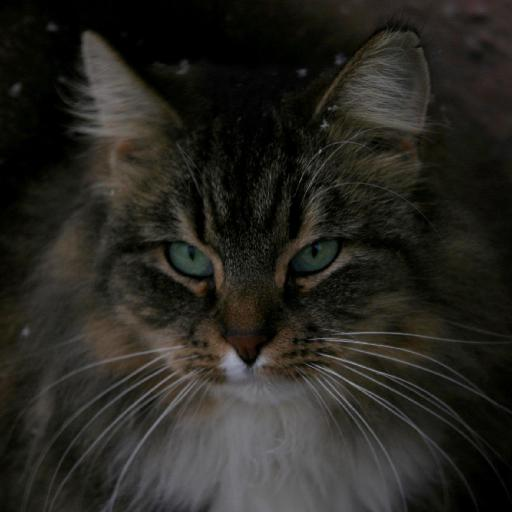

In [3]:
tf.keras.preprocessing.image.load_img('afhq/train/cat/flickr_cat_000002.jpg')

# TRAINING AND TESTING DATA

## Training data

In [4]:
#Generate batches of tensor image data with real-time data augmentation.
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=10,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

#Get images from folder
training_dataset = training_generator.flow_from_directory('afhq/train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [5]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [6]:
training_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

## Testing data

In [7]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


In [8]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# Training neural network

In [9]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu')) #rectified linear unit activation function
#dimensionality of the output space, height and width of the 2D convolution window
#input_shape: input 64x64 RGB pictures in data_format="channels_last"

network.add(MaxPooling2D(pool_size=(2,2)))
#calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map.

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax')) #Softmax converts a vector of values to a probability distribution.

In [10]:
network.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 7317)              4

In [11]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy']), # Optimizer that implements the Adam algorithm.

(None,)

In [12]:
historic = network.fit(training_dataset, epochs=20)

Epoch 1/20
458/458 [==============================] - 131s 284ms/step - loss: 0.5617 - accuracy: 0.7787
Epoch 2/20
458/458 [==============================] - 103s 223ms/step - loss: 0.3208 - accuracy: 0.8744
Epoch 3/20
458/458 [==============================] - 100s 219ms/step - loss: 0.2472 - accuracy: 0.9079
Epoch 4/20
458/458 [==============================] - 102s 222ms/step - loss: 0.2091 - accuracy: 0.9249
Epoch 5/20
458/458 [==============================] - 100s 218ms/step - loss: 0.1881 - accuracy: 0.9313
Epoch 6/20
458/458 [==============================] - 101s 221ms/step - loss: 0.1554 - accuracy: 0.9430
Epoch 7/20
458/458 [==============================] - 99s 216ms/step - loss: 0.1342 - accuracy: 0.9503
Epoch 8/20
458/458 [==============================] - 100s 218ms/step - loss: 0.1340 - accuracy: 0.9522
Epoch 9/20
458/458 [==============================] - 98s 214ms/step - loss: 0.1180 - accuracy: 0.9564
Epoch 10/20
458/458 [==============================] - 93s 203ms/s

# Neural network eval

In [14]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [15]:
forecasts = network.predict(test_dataset)
forecasts

1500/1500 [==============================] - 16s 10ms/step


array([[1.0000000e+00, 1.2703761e-19, 3.7855771e-25],
       [1.0000000e+00, 1.3729182e-11, 1.1522330e-13],
       [9.9996555e-01, 3.4296241e-05, 1.3989329e-07],
       ...,
       [3.5394136e-02, 2.5737350e-07, 9.6460563e-01],
       [4.9493471e-13, 3.3375544e-15, 1.0000000e+00],
       [1.2426064e-05, 1.4002858e-08, 9.9998760e-01]], dtype=float32)

In [16]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [17]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.9586666666666667

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[491,   4,   5],
       [ 14, 458,  28],
       [  7,   4, 489]])

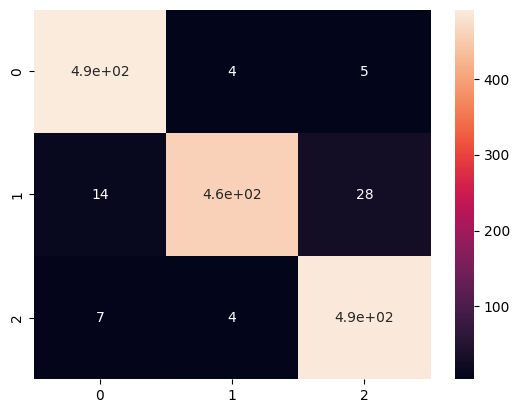

In [20]:
sns.heatmap(cm, annot=True);

## Creating a function to test different activations

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def networkCreation(activationType, activationOutput = 'softmax'):
    network = Sequential()
    network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation= activationType))
    network.add(MaxPooling2D(pool_size=(2,2)))
    
    network.add(Conv2D(32, (3,3), activation= activationType))
    network.add(MaxPooling2D(pool_size=(2,2)))

    network.add(Flatten())

    network.add(Dense(units = 7317, activation= activationType))
    network.add(Dense(units = 7317, activation= activationType))
    network.add(Dense(units = 3, activation=activationOutput))
    print(network.summary())
    return network

def networkCompile(network, optimizerName='Adam', epochsNum=20):
    network.compile(optimizer=optimizerName, loss='categorical_crossentropy', metrics = ['accuracy']), # Optimizer that implements the Adam algorithm.
    historic = network.fit(training_dataset, epochs=epochsNum)

def networkEval(network):
    forecasts = network.predict(test_dataset)
    forecasts = np.argmax(forecasts, axis = 1)

    print(accuracy_score(test_dataset.classes, forecasts))
    cm = confusion_matrix(test_dataset.classes, forecasts)
    print(sns.heatmap(cm, annot=True))
    
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 7317)             

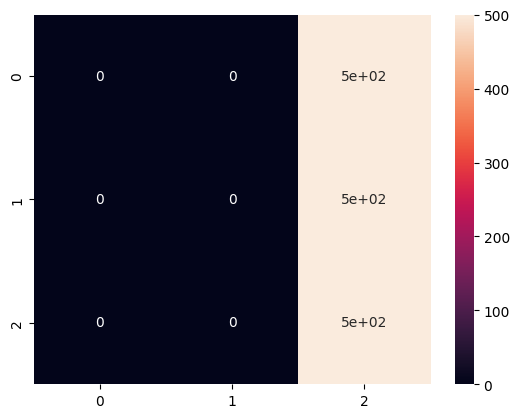

In [22]:
networkTanH = networkCreation('tanh')
networkCompile(networkTanH)
networkEval(networkTanH)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 7317)             

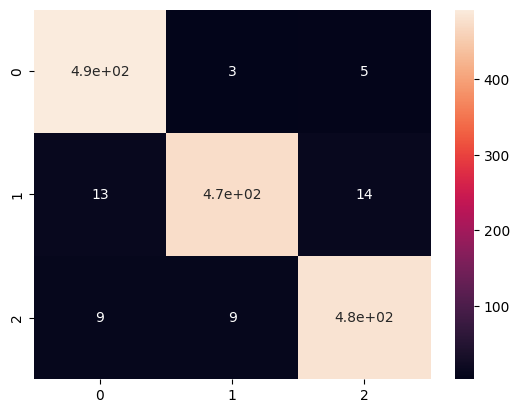

In [27]:
networkSM = networkCreation('relu', 'sigmoid')
networkCompile(networkSM)
networkEval(networkSM)

From the above testing,
Tanh vs ReLU activation function
1. Using a tanh activation function for hidden layers is not feasible. It outputs values in the range of -1 to 1. It's centered around zero, which makes it suitable for tasks where both positive and negative activations are important. Moreover, the Tanh function is nonlinear and has a sigmoid-like shape. It's capable of capturing complex nonlinear relationships in data.

2. The ReLU activation function outputs values in the range of 0 to positive infinity. It becomes active (outputs a non-zero value) only when the input is positive. It also is also nonlinear, but it behaves linearly for positive inputs (output = input) and becomes inactive (output = 0) for negative inputs.

Softmax vs Sigmoid activation function for output layer
1. Use Softmax when you're dealing with a multiclass classification problem, and each input should belong to exactly one class. Softmax ensures that the class probabilities are normalized and mutually exclusive.

2. Use Sigmoid when you're working with a binary classification problem or a multilabel classification problem, where an input can belong to multiple classes. Sigmoid allows you to independently model the probability of each class being present in the input.

Accuracy using Softmax: 0.9586666666666667

Accuracy using Sigmoid: 0.9646666666666667

# Testing with more Epochs

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 7317)             

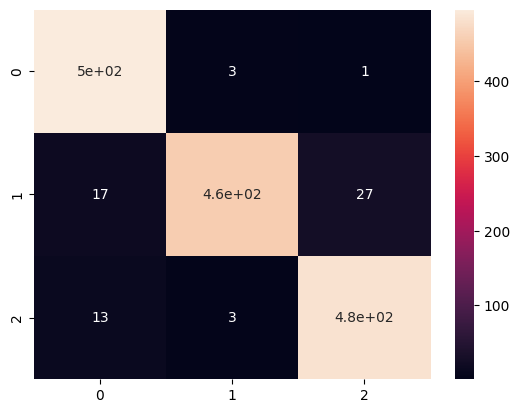

In [29]:
networkRelu = networkCreation('relu')
networkCompile(networkRelu, epochsNum = 40)
networkEval(networkRelu)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_18 (Dense)            (None, 7317)             

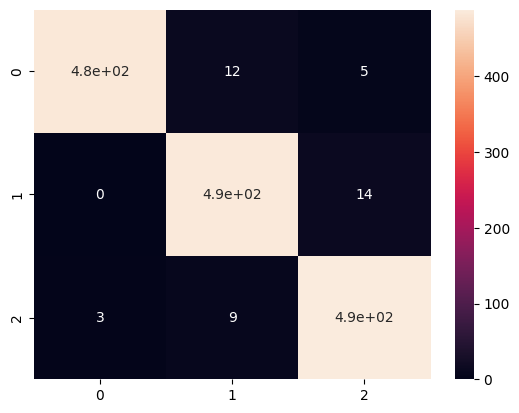

In [30]:
networkRelu = networkCreation('relu', 'sigmoid')
networkCompile(networkRelu, epochsNum = 40)
networkEval(networkRelu)

An epoch is a measure of how many times the model has gone through the entire dataset, including all the batches. After each epoch, the model updates its internal parameters (weights and biases) based on the gradients calculated from the entire training dataset.

20 vs 40 Epochs (ReLU, Sigmoid)

Accuracy using 20 Epochs: 0.9646666666666667

Accuracy using 40 Epochs: 0.9713333333333334